# Customer segmentation (EDA + clustering)

## About the project

This project came to life when I saw a job offer from Wolt company online. I didn't have time to apply then since it was the last day and instead decided to make this assigment into my portfolio project. The following section is the real assignment for the Data Analyst Intern job application.

### Assignment for Data Analyst Intern, Wolt Market team

Attached to this message you’ll find a CSV file with some machine-generated user data of a
service like Wolt. Every row of the dataset represents one customer who has registered to use
the service during September 2019 and either has or hasn’t made orders during the time from
then and October 2020.

Your assignment is to
* create a user segmentation that helps Wolt understand what type of users we have
* familiarize yourself with the dataset and show us your excellent exploratory data analysis skills
* Remember to justify your segmentation approach so that we understand why the way you did it is better than an arbitrary solution by a non-data analyst who can do some slicing-and-dicing with the data.

### Our expectations

At Wolt we use Python or R for notebooks and we expect you to return the rendered notebook
alongside the code used for the analysis. Make sure we can run and view your solution on
MacOS and Linux.
In addition to the notebook used to solve the assignment, please include a separate supporting
presentation that highlights the main steps of the analysis and communicates your findings. As
a further guideline, the presentation should be self-sufficient for us to follow your thought
process when solving the assignment: Please explain why you decided to go with this
particular approach and what could be the pros and cons of applying it.

---


## Process description
    
1. Load the data
2. Prepare the data
3. Segmentation 
- By country (this is currently done with one country only but is easily applied to any other country)
- RFM model
4. K-means clustering

## Getting to know the data

In [1]:
# imports
import pandas as pd
import missingno as msno 
import seaborn as sns
import numpy as np
import re
from matplotlib import pyplot as plt
from ast import literal_eval
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data
data = "dataset_for_analyst_assignment_20201120.csv"
df = pd.read_csv(data)

# format
pd.options.display.float_format='{:.2f}'.format

def summary(df):
    display(df.head())
    print('-'*100)
    display(df.info())
    print('-'*100)
    display(df.describe([0.01,0.25,0.50,0.75,0.99]))
    
summary(df)

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
0,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1,2019-09-01 00:00:00.000,FIN,1,1.00,0.00,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.00,1.00,...,0.00,1.00,NaN,False,23.00,2.00,NaN,NaN,6.85,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01 00:00:00.000,DNK,19,19.00,0.00,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.00,4.00,...,19.00,0.00,NaN,True,21.00,2.00,9.00,3.00,6.56,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
3,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
4,2019-09-01 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,5,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   REGISTRATION_DATE                        21983 non-null  object 
 1   REGISTRATION_COUNTRY                     21983 non-null  object 
 2   PURCHASE_COUNT                           21983 non-null  int64  
 3   PURCHASE_COUNT_DELIVERY                  12028 non-null  float64
 4   PURCHASE_COUNT_TAKEAWAY                  12028 non-null  float64
 5   FIRST_PURCHASE_DAY                       11964 non-null  object 
 6   LAST_PURCHASE_DAY                        12027 non-null  object 
 7   USER_ID                                  21983 non-null  int64  
 8   BREAKFAST_PURCHASES                      12028 non-null  float64
 9   LUNCH_PURCHASES

None

----------------------------------------------------------------------------------------------------


,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,...,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS
count,21983.00,12028.00,12028.00,21983.00,12028.00,12028.00,12028.00,12028.00,12028.00,12028.00,...,12028.00,12028.00,12028.00,12028.00,12028.00,12028.00,12028.00,7832.00,7832.00,12028.00
mean,3.35,5.74,0.37,10992.00,0.19,2.38,0.49,3.03,0.00,176.21,...,42.07,31.20,2.90,1.06,2.16,11.50,4.01,64.29,55.79,5.96
std,8.52,10.54,1.42,6346.09,1.10,5.63,1.83,5.24,0.00,299.09,...,41.18,20.72,7.46,4.78,6.88,6.93,2.01,72.57,74.96,3.47
min,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.01,...,1.02,1.01,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
1%,0.00,0.00,0.00,220.82,0.00,0.00,0.00,0.00,0.00,6.07,...,6.10,6.07,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.12
25%,0.00,1.00,0.00,5496.50,0.00,0.00,0.00,0.00,0.00,32.38,...,23.37,19.23,0.00,0.00,0.00,5.00,2.00,18.00,10.00,2.95
50%,1.00,2.00,0.00,10992.00,0.00,1.00,0.00,1.00,0.00,75.90,...,35.56,27.32,0.00,0.00,0.00,11.50,4.00,39.50,25.00,5.93
75%,3.00,6.00,0.00,16487.50,0.00,2.00,0.00,3.00,0.00,196.33,...,51.82,38.46,2.00,1.00,1.00,18.00,6.00,81.00,68.25,8.98
99%,38.00,46.73,6.00,21763.18,3.73,24.00,7.00,25.00,0.00,1380.56,...,144.00,98.90,33.00,19.00,31.00,23.00,7.00,365.00,365.00,11.90
max,320.00,320.00,44.00,21983.00,52.00,171.00,71.00,104.00,0.00,7979.62,...,3048.00,657.80,200.00,196.00,221.00,23.00,7.00,421.00,421.00,12.00


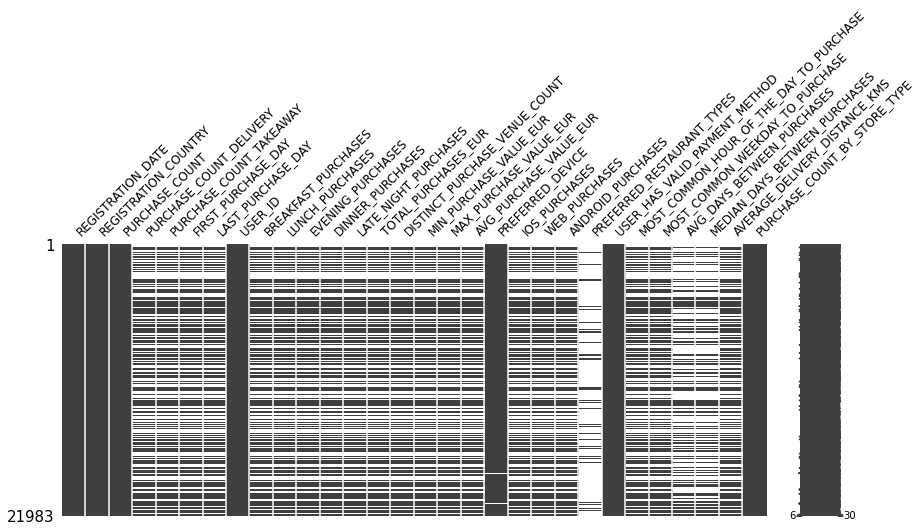

In [3]:
# missing data represented by white color
msno.matrix(df,figsize=(14,5), fontsize=12);

#### Thoughts
- Object-dtypes have to be converted into proper data types
- There is a considerable amount of 0 values
- From the visualization above we can see there's quite a lot of missing data

### Cleaning up the data

In [4]:
# checking the last column
df.iloc[:,-1][0]

'{\n  "General merchandise": 0,\n  "Grocery": 0,\n  "Pet supplies": 0,\n  "Restaurant": 0,\n  "Retail store": 0\n}'

In [5]:
# converting dict inside a string into proper dtype for later use
df.iloc[:,-1] = df.iloc[:,-1].map(literal_eval)

In [6]:
# split the data into columns
df2 = pd.json_normalize(df.iloc[:,-1])
df2.head()

,General merchandise,Grocery,Pet supplies,Restaurant,Retail store
0,0,0,0,0,0
1,0,0,0,1,0
2,1,9,0,9,0
3,0,0,0,0,0
4,0,0,0,0,0


In [7]:
# join the acquired data with the original dataframe
df = df.join(df2)

# remove the old data we just unstacked
df.drop(columns = 'PURCHASE_COUNT_BY_STORE_TYPE', axis = 1, inplace = True)

In [8]:
# convert date into DateTime
df.REGISTRATION_DATE = pd.to_datetime(df.REGISTRATION_DATE)
df.FIRST_PURCHASE_DAY = pd.to_datetime(df.FIRST_PURCHASE_DAY)
df.LAST_PURCHASE_DAY = pd.to_datetime(df.LAST_PURCHASE_DAY)

Checking if the missing values are related to customers who haven't bought anything yet

In [9]:
view = df[df.PURCHASE_COUNT != 0]
view.isna().sum()

REGISTRATION_DATE                             0
REGISTRATION_COUNTRY                          0
PURCHASE_COUNT                                0
PURCHASE_COUNT_DELIVERY                       0
PURCHASE_COUNT_TAKEAWAY                       0
FIRST_PURCHASE_DAY                           64
LAST_PURCHASE_DAY                             1
USER_ID                                       0
BREAKFAST_PURCHASES                           0
LUNCH_PURCHASES                               0
EVENING_PURCHASES                             0
DINNER_PURCHASES                              0
LATE_NIGHT_PURCHASES                          0
TOTAL_PURCHASES_EUR                           0
DISTINCT_PURCHASE_VENUE_COUNT                 0
MIN_PURCHASE_VALUE_EUR                        0
MAX_PURCHASE_VALUE_EUR                        0
AVG_PURCHASE_VALUE_EUR                        0
PREFERRED_DEVICE                              1
IOS_PURCHASES                                 0
WEB_PURCHASES                           

The check was a success and we can safely convert missing values to 0

In [10]:
# convert all missing _counts (NaN) to 0 for later calculations
temp = ['PURCHASE_COUNT_DELIVERY', 'PURCHASE_COUNT_TAKEAWAY', 'DISTINCT_PURCHASE_VENUE_COUNT', 
        'BREAKFAST_PURCHASES', 'LUNCH_PURCHASES', 'EVENING_PURCHASES', 'DINNER_PURCHASES', 'LATE_NIGHT_PURCHASES',
        'TOTAL_PURCHASES_EUR', 'IOS_PURCHASES', 'WEB_PURCHASES' , 'ANDROID_PURCHASES', 'MIN_PURCHASE_VALUE_EUR', 
        'MAX_PURCHASE_VALUE_EUR', 'AVG_PURCHASE_VALUE_EUR']

df.fillna({x:0 for x in temp}, inplace = True)

In [11]:
# checking column
df.PREFERRED_RESTAURANT_TYPES.unique()[:5]

array([nan, '[\n  "american"\n]', '[\n  "japanese"\n]',
       '[\n  "italian"\n]', '[\n  "middle eastern"\n]'], dtype=object)

In [12]:
# filling missing values
df.PREFERRED_RESTAURANT_TYPES.fillna("", inplace = True)

# parsing the string
df.PREFERRED_RESTAURANT_TYPES = df.PREFERRED_RESTAURANT_TYPES.map(lambda x: re.findall('"([^"]*)"', x))

In [13]:
# filling last missing values
print(df.PREFERRED_DEVICE.unique())
df.PREFERRED_DEVICE.fillna("unknown", inplace = True)
print(df.PREFERRED_DEVICE.unique())

['ios' 'android' 'web' nan]
['ios' 'android' 'web' 'unknown']


# Data exploration

## Users by country

In [14]:
# user counts for each country
countries = pd.Series([country for country in df.REGISTRATION_COUNTRY.unique()])
users_in_countries = pd.Series([len(df[df.REGISTRATION_COUNTRY == country]) for country in countries])
df3 = pd.DataFrame([countries, users_in_countries]).T
df3.columns = ['country', 'users']

#sort
df3.sort_values(by = 'users', ascending = False, inplace = True)
df3.head()

,country,users
1,FIN,10277
0,DNK,8081
2,GRC,3042
18,USA,70
11,GBR,54


In [15]:
def pline():
    print("-"*100)
    
top3 = ["FIN", "DNK", "GRC"]

# the amount of users combined in top 3 countries
users_in_top3 = df3[df3.iloc[:,0].isin(top3)].iloc[:,1]
print(f'Total users in top3 countries: {users_in_top3.sum()}')
pline()

# in other countries than top 3
out_of_top3 = df3[~df3.iloc[:,0].isin(top3)].iloc[:,1]
print(f'Total users in other countries: {out_of_top3.sum()}')

# max users in those countries (USA)
print(f'Maximum number of users in those countries: {max(out_of_top3)}')

pline()
# calculate ratio out_of_top3 / all users 
print(f"Countries that aren't part of top3 make {out_of_top3.sum()/df3.users.sum() * 100:.2f} % of the whole dataset")

Total users in top3 countries: 21400
----------------------------------------------------------------------------------------------------
Total users in other countries: 583
Maximum number of users in those countries: 70
----------------------------------------------------------------------------------------------------
Countries that aren't part of top3 make 2.65 % of the whole dataset


#### Thoughts

- If the data is uniform enough it may be possible to use the data as a whole
- If the data differs much by country the segments have to be done by country and not as a whole data
- Most of the countries (other than top 3) have low amount of users. The segmentation might not make any sense there since it won't be generalizeable

### Checking if the data differs by country

In [16]:
# make a new dataframe (table)
df_meals_by_country = pd.DataFrame(df3.country)
labels = ['BREAKFAST_PURCHASES', 'LUNCH_PURCHASES', 'EVENING_PURCHASES', 'DINNER_PURCHASES', 'LATE_NIGHT_PURCHASES']

for meal in labels:
    df_meals_by_country[meal] = ""

# add a total meal purchases column
df_meals_by_country['TOTAL_MEAL_PURCHASES'] = ""
    
# set index
df_meals_by_country.set_index('country', inplace = True)

# aggregate data
for country in df_meals_by_country.index[:-1]:
    temp_df = df[df.REGISTRATION_COUNTRY == country] 
    data_row = [temp_df[meal].sum() for meal in df_meals_by_country.columns[:-1]]
    df_meals_by_country.loc[country] = data_row + [sum(data_row)]
    

df_meals_by_country.head()

,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_MEAL_PURCHASES
country,,,,,,
FIN,1264.00,15915.00,2635.00,14609.00,0.00,34423.00
DNK,327.00,8157.00,812.00,18913.00,0.00,28209.00
GRC,735.00,4365.00,2449.00,2788.00,0.00,10337.00
USA,0.00,0.00,0.00,0.00,0.00,0.00
GBR,0.00,7.00,3.00,7.00,0.00,17.00


In [17]:
# calculating ratios
def calc_ratio(countries, meal1, meal2):
    print(f'{meal1} / {meal2}')
    meal1 += "_PURCHASES"
    meal2 += "_PURCHASES"
    for country in countries:
        print(f'{country}: {df_meals_by_country.loc[country][meal1] / df_meals_by_country.loc[country][meal2]:.2f}')

countries = ['FIN','DNK','GRC']

# BF / LUNCH
calc_ratio(countries, "BREAKFAST", "LUNCH")

print()

# EVENING / DINNER
calc_ratio(countries, "EVENING", "DINNER")

BREAKFAST / LUNCH
FIN: 0.08
DNK: 0.04
GRC: 0.17

EVENING / DINNER
FIN: 0.18
DNK: 0.04
GRC: 0.88


## Conclusion
- We can see from the table and calculations above that the data differs by country. From these observations it seems reasonable to do the segmentation separately for each country.
- In my reasoning the data from other than top 3 (biggest) countries is:  
    1. too different to combine with other countries 
    2. too small in amount to be generalizeable
- I'm going to focus only on FIN, DNK, GRC (top 3) since those countries have enough data available for it to be generalizeable

# USER SEGMENTATION FINLAND

## Preparing the data

In [18]:
def select_country(name):
    return df[df.REGISTRATION_COUNTRY == name].copy()

In [19]:
# select country
country_name = "FIN"

df_sc = select_country(country_name)

In [20]:
# stats
df_sc.describe([0.01,0.25,0.50,0.75,0.99])

,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,...,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,General merchandise,Grocery,Pet supplies,Restaurant,Retail store
count,10277.00,10277.00,10277.00,10277.00,10277.00,10277.00,10277.00,10277.00,10277.00,10277.00,...,5451.00,5451.00,3582.00,3582.00,5451.00,10277.00,10277.00,10277.00,10277.00,10277.00
mean,3.37,3.17,0.20,10789.13,0.12,1.55,0.26,1.42,0.00,90.84,...,11.48,3.98,63.79,54.74,5.99,0.07,0.60,0.01,2.02,0.67
std,8.40,8.13,1.21,6282.32,0.65,4.66,1.03,3.67,0.00,231.98,...,6.97,2.01,71.93,74.29,3.46,0.25,3.05,0.09,4.17,3.04
min,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1%,0.00,0.00,0.00,198.76,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,1.00,1.00,0.12,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,5002.00,0.00,0.00,0.00,0.00,0.00,0.00,...,5.00,2.00,19.00,10.00,3.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,1.00,0.00,11126.00,0.00,0.00,0.00,0.00,0.00,14.17,...,11.00,4.00,39.00,24.00,5.95,0.00,0.00,0.00,1.00,0.00
75%,3.00,3.00,0.00,15978.00,0.00,1.00,0.00,1.00,0.00,81.97,...,18.00,6.00,80.00,65.00,9.00,0.00,0.00,0.00,3.00,0.00
99%,39.00,38.00,4.00,21643.48,3.00,20.00,4.24,17.00,0.00,978.56,...,23.00,7.00,365.38,365.38,11.91,1.00,13.00,0.00,19.00,15.00
max,221.00,221.00,44.00,21974.00,17.00,110.00,26.00,104.00,0.00,7979.62,...,23.00,7.00,421.00,421.00,12.00,1.00,110.00,1.00,110.00,72.00


We can see a lot of the data is made out of users who have bought nothing or very little

## The segments

### Not yet customers

- These users haven't bought anything yet 
- They have shown some interest to the company because they have created an account 
- These users might buy from the company in the future
- We don't have any relevant data from these users yet

In [21]:
not_yet = list(df_sc.TOTAL_PURCHASES_EUR[df_sc.TOTAL_PURCHASES_EUR == 0].index)

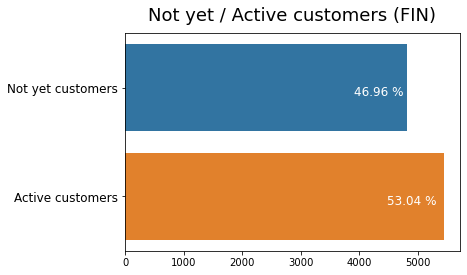

In [22]:
# plot
def plot_not_yet():   
    x = [len(not_yet), len(df_sc) - len(not_yet)]
    y = ['Not yet customers', 'Active customers']
    ax = sns.barplot(x=x, y=y, orient='h')
  
    
    # add percentage
    p_n_y = round(len(df_sc.loc[not_yet]) / len(df_sc) * 100, 2)
    percentage = [p_n_y, 100 - p_n_y]
    for i, p in enumerate(ax.patches):
        width = p.get_width()
        plt.text(p.get_width() * 0.9, p.get_y()+0.55*p.get_height(),
                 f'{percentage[i]} %',
                 ha='center', va='center', color='white', fontsize=12)
    
    # style
    plt.yticks(fontsize=12)
    plt.title(f"Not yet / Active customers ({country_name})", fontsize=18, y=1.03)
   
plot_not_yet()

Almost half of the users are not active yet

### Active customers
- Active users that have started ordering - we will continue segmenting with these users

In [23]:
df_sc_active = df_sc.drop(index = not_yet)

In [24]:
# stats
df_sc_active.describe([0.01,0.25,0.50,0.75,0.99])

,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,...,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,General merchandise,Grocery,Pet supplies,Restaurant,Retail store
count,5451.00,5451.00,5451.00,5451.00,5451.00,5451.00,5451.00,5451.00,5451.00,5451.00,...,5451.00,5451.00,3582.00,3582.00,5451.00,5451.00,5451.00,5451.00,5451.00,5451.00
mean,6.35,5.97,0.38,11052.57,0.23,2.92,0.48,2.68,0.00,171.27,...,11.48,3.98,63.79,54.74,5.99,0.13,1.13,0.02,3.81,1.26
std,10.68,10.39,1.64,6352.20,0.88,6.08,1.37,4.69,0.00,296.13,...,6.97,2.01,71.93,74.29,3.46,0.33,4.12,0.12,5.09,4.08
min,1.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,1.01,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1%,1.00,0.00,0.00,185.00,0.00,0.00,0.00,0.00,0.00,6.07,...,0.00,1.00,1.00,1.00,0.12,0.00,0.00,0.00,1.00,0.00
25%,1.00,1.00,0.00,5239.50,0.00,0.00,0.00,0.00,0.00,31.37,...,5.00,2.00,19.00,10.00,3.00,0.00,0.00,0.00,1.00,0.00
50%,3.00,2.00,0.00,11792.00,0.00,1.00,0.00,1.00,0.00,74.89,...,11.00,4.00,39.00,24.00,5.95,0.00,0.00,0.00,3.00,0.00
75%,7.00,6.00,0.00,16211.50,0.00,3.00,0.00,3.00,0.00,193.80,...,18.00,6.00,80.00,65.00,9.00,0.00,0.00,0.00,4.00,0.00
99%,47.00,46.00,7.00,21658.50,4.00,26.00,6.00,22.00,0.00,1258.93,...,23.00,7.00,365.38,365.38,11.91,1.00,18.00,1.00,23.00,19.00
max,221.00,221.00,44.00,21974.00,17.00,110.00,26.00,104.00,0.00,7979.62,...,23.00,7.00,421.00,421.00,12.00,1.00,110.00,1.00,110.00,72.00


#### Checking for outliers

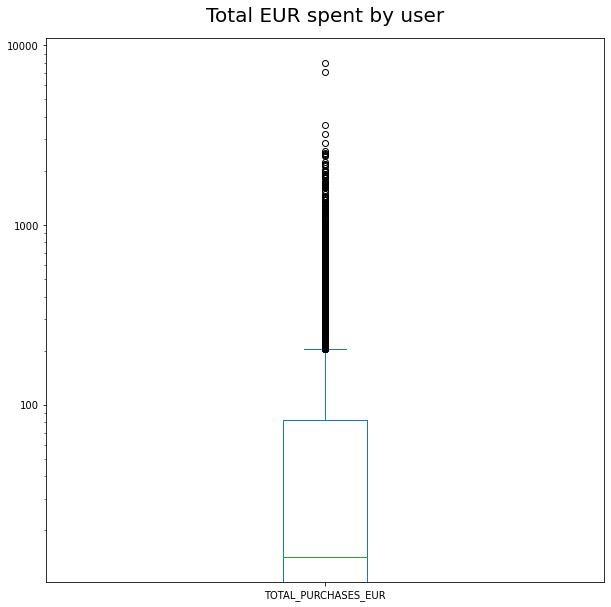

In [25]:
# plot
df_sc.TOTAL_PURCHASES_EUR.plot(kind='box', figsize=((10,10)))

# style
ax=plt.gca()
ax.set_yscale('log') #switch y-axis to log-scale to remove skew towards large values
ax.set_yticklabels([0,0,100,1000,10000])
plt.title("Total EUR spent by user", y=1.02, fontsize=20)
plt.xlabel("")
plt.show()

**Empirical rule** states that in a normal distribution, almost all observed data will fall within three standard deviations of the mean.

From here we can deduce that values outside of the said range might be outliers.

In [26]:
tpe = df_sc.TOTAL_PURCHASES_EUR
print(f'Value for mean + 3 * std: {tpe.mean() + 3 * tpe.std():.2f}')

Value for mean + 3 * std: 786.79


- If we look at the box plot above we can see a number of users that are above that range
- There are two data points near 8000 EUR mark that might be outliers
- There are also three data points near 3000 EUR mark that stand out a bit from the rest 
- In my opinion all of the values present seem believable and may not be outliers

In [27]:
# CODE TO REMOVE OUTLIERS IF NEEDED

#outliers = list(df_sc[df_sc.TOTAL_PURCHASES_EUR > 2600].index)
#print(len(outliers))

# drop the 5 (2+3) outliers from dataset since they're too few to form a relevant sized group
#df_sc = df_sc.drop(index = outliers)

## Finding segments from active users group

### The RFM model

The letters in RFM come from *Recency*, *Frequency*, *Monetary*. The RFM model tries to sort out the best customers according to the three following attributes:
1. most recent purchase date 
2. number of transactions within the period (often a year) 
3. total or average sales attributed to the customer (total or average margin works even better)

The higher the RFM score, the more valuable the customer.

In [28]:
# RFM dataframe
rfm_df = df_sc_active[['LAST_PURCHASE_DAY', 'PURCHASE_COUNT', 
                       'TOTAL_PURCHASES_EUR', 'USER_ID']].copy()
rfm_df.set_index('USER_ID', inplace = True)

In [29]:
# showing rows (users) with missing values
rfm_df.isna().sum()

LAST_PURCHASE_DAY      1
PURCHASE_COUNT         0
TOTAL_PURCHASES_EUR    0
dtype: int64

In [30]:
# removing this one row since it doesn't have enough data and the sample is big enough without it
drop = list(rfm_df[pd.isnull(rfm_df.LAST_PURCHASE_DAY)].index)
rfm_df.drop(index = drop, inplace = True)

In [31]:
# calculate RFM scores 
rfm_df['R'] = pd.qcut(rfm_df['LAST_PURCHASE_DAY'].rank(method='first'), 5 , labels = [1,2,3,4,5])
rfm_df['F'] = pd.qcut(rfm_df['PURCHASE_COUNT'].rank(method='first'), 5, labels = [1,2,3,4,5])
rfm_df['M'] = pd.qcut(rfm_df['TOTAL_PURCHASES_EUR'].rank(method='first'), 5, labels = [1,2,3,4,5])

rfm_df['RFM_Score'] = rfm_df['R'].astype(str) + rfm_df['F'].astype(str) + rfm_df['M'].astype(str)

The qcut-function tries to make all quartiles in the data equal sized. I decided to divide the data into 5 categories. The data didnt divide properly to 5 categories because of duplicate values so I had to use the rank-method to give ranks to the duplicates. The result is that some of the duplicates will belong to a different (adjacent) category.

### Segments

The different segments are assigned according to R- and F-scores of each user's data. R-score is given according to how recently active the user has been and F-score is given according to how many purchases the user has made.

#### Labels

*Hibernating* customers haven't been active for a longer period and made only a few purchases

*At Risk* group hasn't been active for a longer period but made considerable purchases before

*Can't Loose* group hasn't been active for a longer period but made **vast purchases** before

*About to Sleep* group has been active some time ago but hasn't bought much 

*Need Attention* group has been active some time ago and also made notable purchases

*Loyal Customers* have been active quite recently or some time ago and made considerable purchases before

*Promising* customers have been active some time ago and made a few purchases

*New Customers* have been active recently and made a few purchases

*Potential Loyalists* have been active recently and made notable purchases

*Premier Customers* have been active recently and made considerable or vast purchases before

In [32]:
segments = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Premier Customers'
}

rfm_df['Segment'] = rfm_df['R'].astype(str) + rfm_df['F'].astype(str)
rfm_df['Segment'] = rfm_df['Segment'].replace(segments, regex=True)

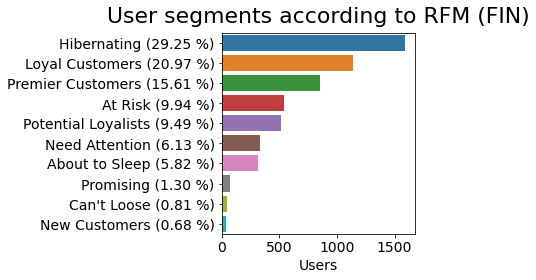

In [33]:
# plot

def plot_rfm(df):
    total_size = len(df)
    segment_list = list(df.Segment.unique())

    # sort biggest groups first
    x = [len(df[df.Segment == name]) for name in segment_list]
    sortedIndex = list(np.argsort(x))[::-1]
    x = [x[i] for i in sortedIndex]

    y = [f'{name} ({len(df[df.Segment == name]) / total_size * 100:.2f} %)' for name in segment_list]
    y = [y[i] for i in sortedIndex]

    sns.barplot(x=x, y=y, orient='h')

    # style
    plt.title(f"User segments according to RFM ({country_name})", y=1.02, fontsize=22)
    plt.xlabel("Users", fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.xticks(fontsize = 14)
    plt.tight_layout()
    plt.show()
    
    return sortedIndex
    
# get sorted index for segments    
seg_sorted_i = plot_rfm(rfm_df)

---

## Getting into details

It's possible to get further details about each segment with this dataset. Next are presented some examples. The content of the functions I made could be changed quickly to match other attributes we might be more interested in.

### Plotting

In [34]:
def get_segments():  
    
    # get segment names and sort the list    
    seg_list = [name for name in rfm_df.Segment.unique()]
    seg_list = [seg_list[i] for i in seg_sorted_i]
    
    return seg_list
    
def get_views(seg_list: list):
    
    # get views for each segment
    views = {}
    
    for name in seg_list:
        id_list = rfm_df[rfm_df.Segment == name].index.tolist()
        views[name] = df.loc[df.USER_ID.isin(id_list)]
    
    return views

def plot_segments_restaurant(views: dict, seg_list: list, palette: list):
 
    # subplots
    fig = plt.figure(figsize=(16, 13))
    plt.subplots_adjust(hspace=0.5, wspace=0.7)
    plt.suptitle(f"Preferred restaurant types / segment\n({country_name})", fontsize=24, y=0.99)
    fig.patch.set_facecolor('white')
    
    # get color map
    color_labels = df.PREFERRED_RESTAURANT_TYPES.explode().dropna().unique()
    palette = dict(zip(color_labels, palette))           

    # loop through segments and get index
    for i, name in enumerate(seg_list):

        # add a new subplot iteratively
        ax = plt.subplot(4, 3, i + 1) # we need + 1 because subplots start at 1
        
        # get data
        data = views[name]['PREFERRED_RESTAURANT_TYPES'].explode().value_counts().sort_values(ascending = False)
        
        #plot segment on the axis            
        sns.barplot(x=data, y=data.index, orient='h', ax=ax, palette=palette)

        # style
        ax.set_title(name)
        plt.xlabel("")

def plot_segments_store_types(views: dict, seg_list:list, palette: list):
    target = ['General merchandise', 'Grocery', 'Pet supplies', 'Restaurant', 'Retail store']
    
    # subplots
    fig = plt.figure(figsize=(16, 13))
    plt.subplots_adjust(hspace=0.5, wspace=0.7)
    plt.suptitle(f"Purchase count by store type / segment\n({country_name})", fontsize=24, y=0.99)
    fig.patch.set_facecolor('white')
    
    # get color map
    color_labels = target
    palette = dict(zip(color_labels, palette))           

    # loop through segments and get index
    for i, name in enumerate(seg_list):

        # add a new subplot iteratively
        ax = plt.subplot(4, 3, i + 1) # we need + 1 because subplots start at 1
        
        # get data
        data = views[name][target].sum(axis=0)
        
        # get sorted index
        sorted_target = list(np.argsort(data))[::-1]
        
        # sort data & labels
        sorted_data = [data[i] for i in sorted_target]
        sorted_labels = [target[i] for i in sorted_target]

        #plot segment on the axis            
        sns.barplot(x=sorted_data, y=sorted_labels, ax=ax, orient='h', palette=palette)

        # style
        ax.set_title(name, fontsize=12)
        plt.xlabel("") 

def plot_segments_delivery(views: dict, seg_list:list, palette: list):
    target = ['PURCHASE_COUNT_DELIVERY', 'PURCHASE_COUNT_TAKEAWAY']
    
    # subplots
    fig = plt.figure(figsize=(16, 13))
    plt.subplots_adjust(hspace=0.5, wspace=0.7)
    plt.suptitle(f"Order type / segment\n({country_name})", fontsize=26, y=0.99)
    fig.patch.set_facecolor('white')
    
    # get color map
    color_labels = target
    palette = dict(zip(color_labels, palette))           

    # loop through segments and get index
    for i, name in enumerate(seg_list):

        # add a new subplot iteratively
        ax = plt.subplot(4, 3, i + 1) # we need + 1 because subplots start at 1
        
        # get data
        data = views[name][target].sum(axis=0)
        
        # get sorted index
        sorted_target = list(np.argsort(data))[::-1]
        
        # sort data & labels
        sorted_data = [data[i] for i in sorted_target]
        sorted_labels = [target[i] for i in sorted_target]

        #plot segment on the axis            
        sns.barplot(x=sorted_data, y=sorted_labels, ax=ax, orient='h', palette=palette)

        # style
        ax.set_title(name, fontsize=16)
        ax.set_yticks(range(2), labels=['Delivery', 'Takeaway'], fontsize=12)
        plt.xlabel("") 

In [35]:
# palettes - courtesy of https://medialab.github.io/iwanthue/
palette_restaurant = ["#f34c5e", "#56ae38", "#6a47ba", "#d7db5a", "#d2247b", 
                      "#009962", "#8b0027", "#b2e19c", "#ca4523", "#00520d",
                      "#ffa452", "#823629", "#d6d985", "#ffa782"]

palette_store_types = ["#bd0087", "#75aaff", "#ff7e62", "#7f64ff", "#0035a3"]

palette_delivery = ["#4d9fff", "#901a00"]

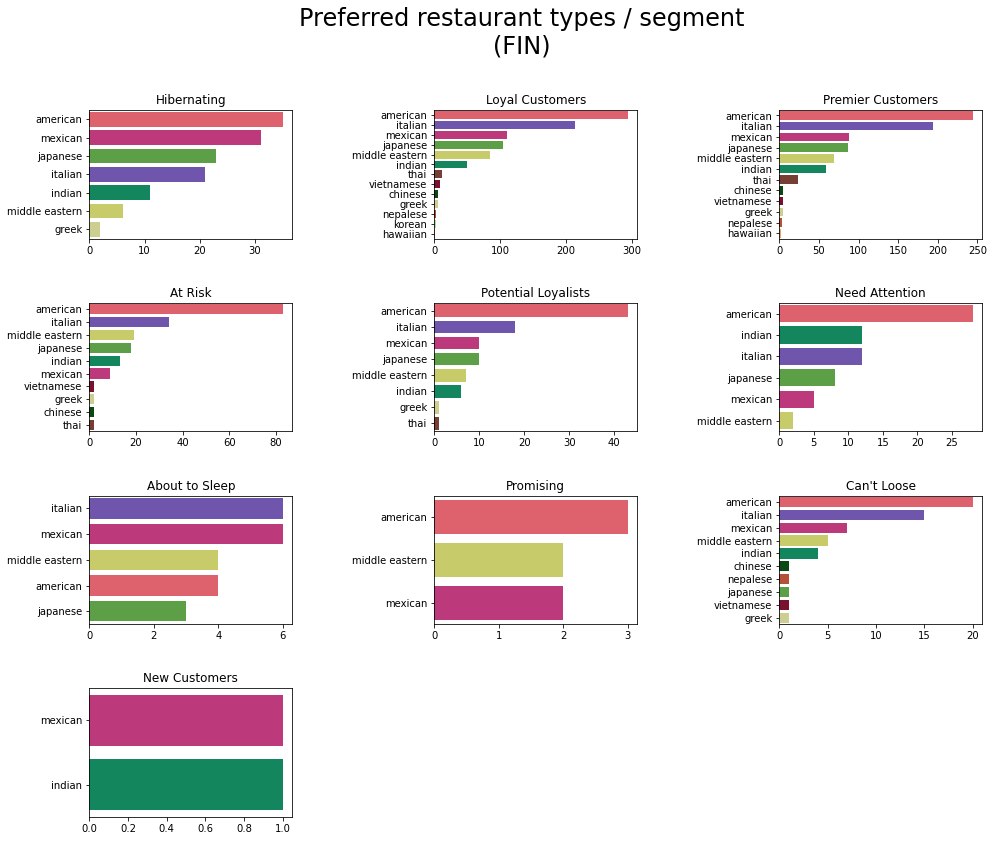

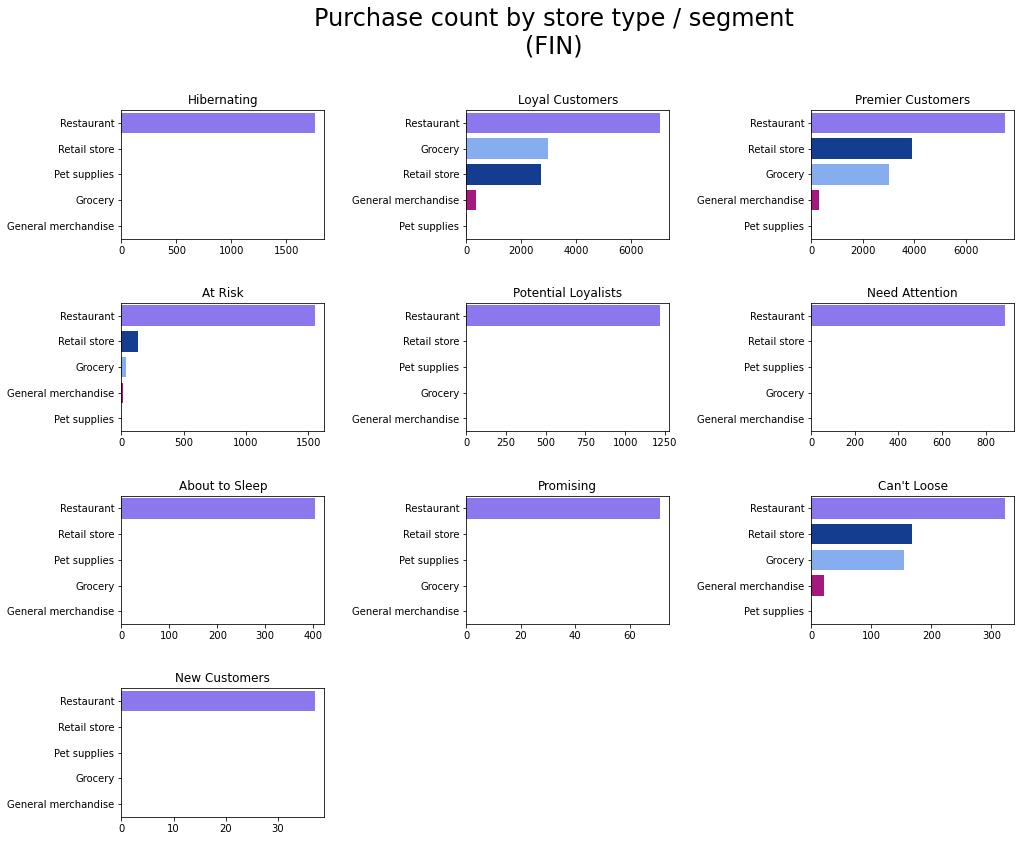

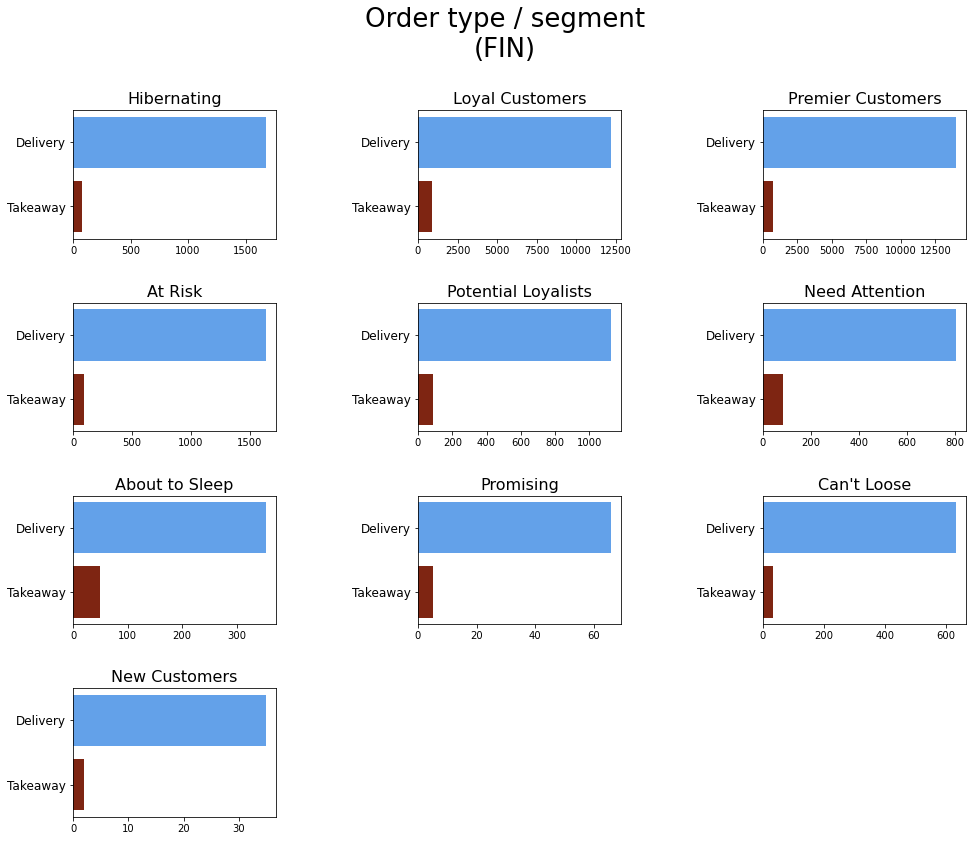

In [36]:
# plot
seg_list = get_segments()
views = get_views(seg_list)
plot_segments_restaurant(views, seg_list, palette_restaurant)
plot_segments_store_types(views, seg_list, palette_store_types)
plot_segments_delivery(views, seg_list, palette_delivery)

---

# K-means clustering

K-means clustering is an unsupervised machine learning algorithm. That means that when we fit the model to the data the algorithm independently searches for clusters of data points – in this case it tries to make clusters of users. The end result would be a certain amount of clusters that could be interpreted as segments found in the data. The method used in classifying the data points (=users) to each cluster is by similar values in each user's data.

## by country
We will continue clustering with one country's data to see if the results are similar to what we got with RFM model. 

In [37]:
# imports
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

### Prepare the data

In [38]:
# make new DataFrame with same columns as RFM model had
new_df = df_sc_active[['LAST_PURCHASE_DAY', 'PURCHASE_COUNT', 'TOTAL_PURCHASES_EUR']].copy()

In [39]:
new_df.isna().sum()

LAST_PURCHASE_DAY      1
PURCHASE_COUNT         0
TOTAL_PURCHASES_EUR    0
dtype: int64

In [40]:
# removing this one row since it doesn't have enough data and the sample is big enough without it
drop = list(new_df[pd.isnull(new_df.LAST_PURCHASE_DAY)].index)
new_df.drop(index = drop, inplace = True)

In [41]:
# new column for recency in purchases
most_recent = new_df.LAST_PURCHASE_DAY.max()
new_df['days_from_purchases'] = (most_recent - new_df.LAST_PURCHASE_DAY).dt.days

# remove datetime columns
new_df.drop(columns = ['LAST_PURCHASE_DAY'], inplace = True)

### Outliers

In [42]:
# for modeling we should remove our outliers in TOTAL_PURCHASES_EUR
new_df.describe([0.01,0.25,0.50,0.75,0.99])

,PURCHASE_COUNT,TOTAL_PURCHASES_EUR,days_from_purchases
count,5450.00,5450.00,5450.00
mean,6.35,171.29,193.70
std,10.68,296.15,162.24
min,1.00,1.01,0.00
1%,1.00,6.07,0.00
25%,1.00,31.37,30.00
50%,3.00,74.89,159.00
75%,7.00,194.05,386.00
99%,47.00,1259.01,425.00
max,221.00,7979.62,426.00


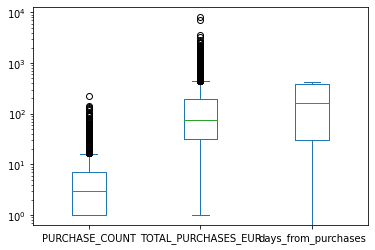

In [43]:
new_df.plot(kind='box')
ax=plt.gca()
ax.set_yscale('log')

In [44]:
new_df[new_df.PURCHASE_COUNT >  new_df.PURCHASE_COUNT.quantile(.99)].sort_values(by='PURCHASE_COUNT').tail()

,PURCHASE_COUNT,TOTAL_PURCHASES_EUR,days_from_purchases
3360,125,2459.16,0
1838,130,2568.46,1
1578,133,3208.04,127
18771,144,3584.50,10
18672,221,7080.96,53


In [45]:
# remove outliers

outliers = list(new_df[new_df.TOTAL_PURCHASES_EUR > 2600].index) # this is the 5 outliers identified at RFM-model before
new_df = new_df.drop(index = outliers) # this also removes the one above from PURCHASE_COUNT 

#### Correlation

<AxesSubplot:>

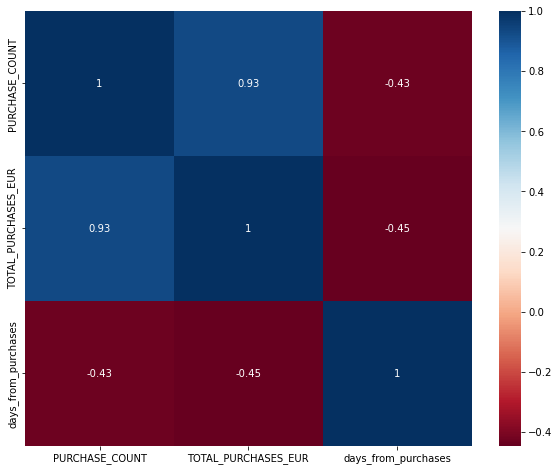

In [46]:
# correlation
plt.figure(figsize=(10,8))
ax=plt.subplot(111)
sns.heatmap(new_df.corr(),ax=ax,annot=True,cmap='RdBu')

There is high correlation present: Number of purchases & Sum of purchases

### Scaling the data (normalization)

In [47]:
# using MinMaxScaler because it retains the original shape of the data (data is skewed)
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(new_df)

### Determine optimal number of cluster

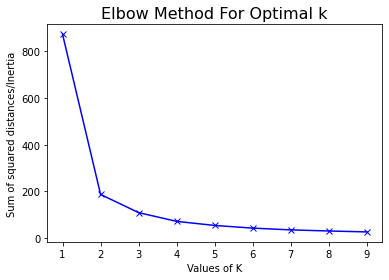

In [48]:
# elbow method
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(df_scaled)
    Sum_of_squared_distances.append(kmeans.inertia_)
    
# plot
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k', fontsize=16)
plt.show()

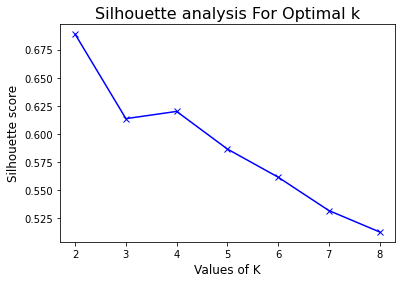

In [49]:
# silhouette score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(df_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(df_scaled, cluster_labels))

# plot
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K', fontsize = 12) 
plt.ylabel('Silhouette score', fontsize = 12) 
plt.title('Silhouette analysis For Optimal k', fontsize = 16)
plt.show()

#### Conclusion
The elbow starts at 2 suggesting 2 clusters (might be 3)

For silhouette score the highest value is the best and this would suggest the number of clusters as 2 (4 might also be a possibility as 2nd option)

### K-means modeling (clusters = 2)

Text(0.5, 0, 'X')

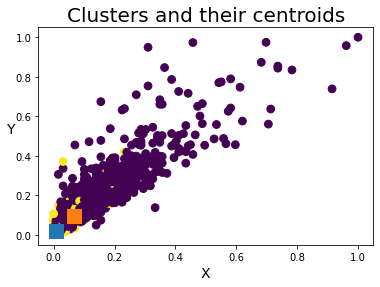

In [50]:
# model
kmean = KMeans(n_clusters = 2).fit(df_scaled)

# get centroids
centroids = kmean.cluster_centers_

# plot the clusters
labels = KMeans(2, random_state=0).fit_predict(df_scaled)

plt.scatter(df_scaled[:, 0], df_scaled[:, 1], s=60, c=labels, cmap='viridis')


plt.scatter(centroids[0][0], centroids[0][1], s=200, cmap='viridis', marker='s')
plt.scatter(centroids[1][0], centroids[1][1], s=200, cmap='viridis', marker='s')


plt.rcParams["figure.figsize"] = [10, 8]
plt.title("Clusters and their centroids", fontsize = 20)
plt.ylabel("Y", rotation = 0, fontsize = 14)
plt.xlabel("X", fontsize = 14)

In [51]:
new_df['Segment K-means'] = kmean.labels_

In [54]:
df_segm_analysis = new_df.groupby(['Segment K-means']).mean()
df_segm_analysis

,PURCHASE_COUNT,TOTAL_PURCHASES_EUR,days_from_purchases
Segment K-means,,,
0,2.04,55.76,366.44
1,9.42,250.80,63.55


## Analysis of K-means clustering

#### With the columns from the earlier RFM-model: K-means clustering got us 2 segments.

- segment 0 is a high buyer and has bought more recently
- segment 1 buys less and the average days from last purchase is a lot more 

This would agree with the RFM model but it's just that the segments are a lot bigger here